# Data Challenge 13 — Interpreting Logistic Regression 

**Purpose**  
Apply what you learned about logistic regression interpretation by analyzing NYC Restaurant Inspection data. 
 
You’ll practice interpreting **continuous**, **binary**, and **categorical** predictors, compute **odds ratios**, and assess model accuracy. 

**Learning Goals**
- Convert coefficients to odds ratios using `np.exp()`.  
- Interpret ORs for continuous, binary, and categorical predictors.  
- Use accuracy to assess logistic regression performance.  
- Communicate results clearly and responsibly.  

**Data:** June 1, 2025 - Nov 4, 2025 Restaurant Health Inspection

[Restaurant Health Inspection](https://data.cityofnewyork.us/Health/DOHMH-New-York-City-Restaurant-Inspection-Results/43nn-pn8j/about_data)


## Instructor Guidance

**Hint: Use the Lecture Deck, Canvas Reading, and Docs to help you with the code**

Use this guide live; students implement below.

**Docs (Quick Links)**
- LogisticRegression — https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html  
- accuracy_score — https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html  
- OneHotEncoder — https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html  
- StandardScaler — https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
- np.exp — https://numpy.org/doc/stable/reference/generated/numpy.exp.html  

**Pseudocode Plan**

1️⃣ Load cleaned restaurant inspection data from the previous challenge.  
2️⃣ Define target = `IS_A` (1 = Grade A, 0 = otherwise).  
3️⃣ Predictors →  
    • Continuous = `SCORE`  
    • Binary = `CRITICAL_NUM`  
    • Categorical = `BORO`  
4️⃣ Scale continuous variables; encode categorical ones.  
5️⃣ Fit `LogisticRegression`.  
6️⃣ Exponentiate coefficients (np.exp()) → odds ratios.  
7️⃣ Interpret one continuous, one binary, and one categorical coefficient.  
8️⃣ Evaluate accuracy.  
9️⃣ Reflect on scaling choices and communication of odds.  


## You Do — Student Section
Work in pairs. Comment your choices briefly. Keep code simple—only coerce the columns you use.

## Step 1 — Imports and Plot Defaults

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Step 2 — Load CSV, Create Columns, Preview

- Point to your New York City Restaurant Inspection Data 
- Create the `is_A` and `critical_num` columns like you did in L11 notebook

In [2]:
df = pd.read_csv('/Users/ayemaq/Desktop/marcy_lab/DA2025_Lectures/Mod6/data/DOHMH_New_York_City_Restaurant_Inspection_Results_20251104 copy.csv')

In [3]:
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,Location
0,50174196,THE GREATS OF CRAFT,Queens,47-20,CENTER BOULEVARD,11109.0,3479312023,NaN,01/01/1900,NaN,...,NaN,40.745641,-73.957137,402.0,26.0,100.0,4538318.0,4.000210e+09,QN31,POINT (-73.957136627525 40.745640668157)
1,50140563,CANTEEN @ CHELSEA PIERS FIELD HOUSE,Brooklyn,601,DEAN STREET,11238.0,6313880993,NaN,01/01/1900,NaN,...,NaN,40.680616,-73.969992,308.0,35.0,16300.0,3428601.0,3.000000e+09,BK64,POINT (-73.969992200023 40.68061568349)
2,50177123,70 7TH AVENUE SOUTH THEROS LLC,Queens,3009,35TH ST,11103.0,6468076482,NaN,01/01/1900,NaN,...,NaN,40.764778,-73.918674,401.0,22.0,6300.0,4009926.0,4.006500e+09,QN70,POINT (-73.918674354617 40.764778282908)
3,50001285,Y & B ENTERTAINMENT MANOR,Queens,3509,PRINCE STRRET,NaN,7188881778,Korean,06/24/2018,Violations were cited in the following area(s).,...,Smoke-Free Air Act / Initial Inspection,0.000000,0.000000,NaN,NaN,NaN,NaN,4.000000e+00,NaN,NaN
4,50172517,MAPLE CREAMERY,Brooklyn,653,STERLING PLACE,11216.0,7188095106,NaN,01/01/1900,NaN,...,NaN,40.673255,-73.956830,308.0,35.0,21900.0,3031390.0,3.012380e+09,BK61,POINT (-73.956830036833 40.673255481805)


In [4]:
df.keys()

Index(['CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE', 'PHONE',
       'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION', 'VIOLATION CODE',
       'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE', 'GRADE',
       'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'BIN', 'BBL',
       'NTA', 'Location'],
      dtype='object')

### CLEAN-UP FIRST 🧹
- Like before, I'm going to clean the grade, score column

In [ ]:
# clean up the dataaaa
df['GRADE'].isna().sum()

149068

In [6]:
df['SCORE'] = pd.to_numeric(df['SCORE'], errors = 'coerce')

In [7]:
# because grade is missing a lot of values, ill create a function to impute the data based on the score
def assign_grade(score):
    if pd.isna(score):
        return np.nan
    elif score < 14:
        score = 'A'
    elif 14 >= score <= 27:
        score = 'B'
    else:
        'C'

In [9]:
# apply assign_grade
df['SCORE'] = df['SCORE'].fillna(df['SCORE'].apply(assign_grade))

In [10]:
# `is_A` function, 1 if its 'A'
df['is_A'] = df['GRADE'].apply(lambda g: 1 if g== 'A' else 0)

In [8]:
# create critical_num
df['critical_num'] = df['CRITICAL FLAG'].apply(lambda x: 1 if x == 'Critical' else 0)
# create is_A

In [12]:
# sanity check
df[['SCORE', 'GRADE', 'is_A', 'critical_num']].tail()

,SCORE,GRADE,is_A,critical_num
291273,0.0,NaN,0,0
291274,40.0,NaN,0,1
291275,27.0,B,0,1
291276,31.0,N,0,0
291277,6.0,A,1,0


In [16]:
df['BORO'].isnull().sum()

0

In [17]:
# count how many types of boros we have
df['BORO'].value_counts()

BORO
Manhattan        107907
Brooklyn          74880
Queens            71694
Bronx             26750
Staten Island     10025
0                    22
Name: count, dtype: int64

In [32]:
# only include boroughs except 0, because 0 is unknown and theres only 22 entries
df = df[df['BORO'] != 0]

In [33]:
# Drop rows where SCORE or GRADE is missing
df = df.dropna(subset=['SCORE', 'GRADE'])


## Step 3 — Define Predictors & Target

- Target is `is_A` 
- X predictors are: SCORE, CRITICAL_NUM (created in Step 2), BORO


In [34]:
# y is is_A and X is critical_num and BORO and SCORE
X = df[['critical_num', 'BORO', 'SCORE']]
y = df['is_A']

## Step 4 — Split Data (70/30 Stratify by Target)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, stratify=y)

## Step 5 – Preprocessing (You can chose to do this in a Pipeline)  

- Scale continuous features 
    - SCORE and critical_num
- Pass binary as is  
- One-hot encode categorical feature (`BORO`)  

In [36]:
# scale continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['SCORE', 'critical_num']])
X_test_scaled = scaler.transform(X_test[['SCORE', 'critical_num']])

In [37]:
X_train['SCORE'].describe()


count    99535.000000
mean        16.651188
std         13.429562
min          0.000000
25%         10.000000
50%         12.000000
75%         20.000000
max        203.000000
Name: SCORE, dtype: float64

In [38]:
# one hot encode BORO
X_train = pd.get_dummies(X_train, columns=['BORO'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['BORO'], drop_first=True)

In [39]:
X_train.head()


,critical_num,SCORE,BORO_Brooklyn,BORO_Manhattan,BORO_Queens,BORO_Staten Island
201172,0,13.0,False,True,False,False
133835,0,22.0,True,False,False,False
10191,0,12.0,False,False,True,False
141599,1,31.0,False,True,False,False
267261,1,7.0,True,False,False,False


In [40]:
X_train['BORO_Queens'].value_counts()

BORO_Queens
False    75401
True     24134
Name: count, dtype: int64

## Step 6 – Fit Model & Evaluate Accuracy

- Fit `is_A ~ score` using **LogisticRegression**  
- Compute predictions with `.predict()`  
- Evaluate accuracy with `accuracy_score()`

In [ ]:
modelA = LogisticRegression(max_iter=1000)
modelA.fit(X_train, y_train)

y_pred_logistic = modelA.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy:", accuracy)


Accuracy: 0.9703227923767552


In [60]:
X_train.columns


Index(['critical_num', 'SCORE', 'BORO_Brooklyn', 'BORO_Manhattan',
       'BORO_Queens', 'BORO_Staten Island'],
      dtype='object')

## Step 7 – Extract Coefficients and Convert to Odds Ratios


In [ ]:
coef = modelA.coef_[0]
intercept = modelA.intercept_[0]

# convert the log-odds into odds ratios
odds_ratios = np.exp(coef)
baseline_odds = np.exp(intercept)

# create a cleannnn results table
results = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient (log-odds)': coef,
    'Odds Ratio': odds_ratios
})

print(f"Intercept (baseline log-odds): {intercept:.4f}")
print(f"Baseline odds: {baseline_odds:.4f}")
results


Intercept (baseline log-odds): 9.7034
Baseline odds: 16373.6729


,Feature,Coefficient (log-odds),Odds Ratio
0,critical_num,0.207096,1.230101
1,SCORE,-0.605443,0.545832
2,BORO_Brooklyn,-0.019692,0.980500
3,BORO_Manhattan,0.051165,1.052497
4,BORO_Queens,0.076301,1.079287
5,BORO_Staten Island,0.148447,1.160031


## Step 8 – Interpret Each Predictor 

**Remember**
💡 OR > 1 → increases odds of Grade A
💡 OR < 1 → decreases odds of Grade A

**Type markdown interpreting all 3 predictors in plain english**
- **critical_num**: The odds ratio is about **1.23**, which means that having a *critical violation flag* slightly **increases** the odds of getting an A by about 23%. This is a bit counterintuitive, so it might suggest some noise in the data or that not all “critical” flags equally affect the grade outcome.

- **SCORE**: The odds ratio is **0.55**, which is less than 1. This means as the inspection score increases (which actually represents worse inspection results), the odds of getting an A **decrease**; restaurants with higher scores are less likely to earn an A grade.

- **BORO (Brooklyn, Manhattan, Queens, Staten Island)**:  
  Boroughs all hover around 1, which means their effect on grades is **minor**.  
  - Brooklyn’s odds ratio (0.98) suggests a *tiny decrease* in A grades.  
  - Manhattan (1.05) and Queens (1.08) have *slightly higher* chances of getting an A.  
  - Staten Island (1.16) shows the biggest increase, restaurants there are about **16% more likely** to get an A compared to the baseline borough (which was dropped during encoding, likely The Bronx).



# We Share — Reflection & Wrap-Up

Write **one short paragraphs** (4–6 sentences). Be specific and use evidence from your notebook.
- I realized that a higher odds ratio doesn’t always mean a better outcome, it depends on the context. For example, the odds ratio for score is 0.55, which is less than 1. That means as the inspection score increases (which actually represents worse inspection results), the odds of earning an A decrease. In other words, restaurants with higher scores are less likely to get an A grade. On the other hand, Staten Island had a slightly higher odds ratio (1.16), suggesting that restaurants there are somewhat more likely to get an A compared to other boroughs.
**Which predictor had the strongest relationship with getting an A grade?**  
Use the odds ratios and accuracy to support your answer.  
- I believe score was the strongest predictor of whether a restaurant received an A. Its odds ratio of 0.55 shows a clear negative relationship; when the inspection score goes up, the odds of an A drop significantly. This makes sense because the “score” itself measures violations, so higher scores naturally mean worse inspection outcomes.

### Breakdown so my brain can comprehend...  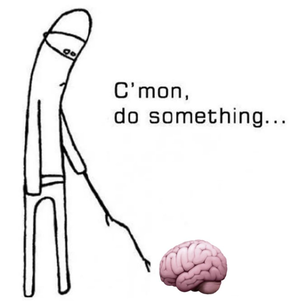

I used logistic regression to predict whether a restaurant got an A grade(1) or not (0) based off 
- How many critical violatios it had aka critical num
- the insepection score(SCORE)
- and which borough it's in (BORO)


#### STEP 7 BRAIN FOG
- `coef = modelA.coef_[0]` 
    - This gives you the coefficients from your logistic regression model.
    - Each coefficient tells you:
        - If this feature increases by 1 unit, how does that affect the log odds of getting an A?

##### Log odds 
- It's a mathematical way of measuring likelihoods in logistic regression
    - `intercept = modelA.intercept_[0]`
        - This is the model’s starting point, the base log-odds before any features change.
        - I don't know what that means so let's further break it down:
            - Logistic regression isn’t predicting “yes” or “no” directly. Instead, it predicts a probability like: “This restaurant has a 90% chance of being an A.”
            - To get to that probability, logistic regression uses log-odds behind the scenes.
        - What are log odds? 
            - They’re just a different scale for expressing probability, one that can handle the math nicely.
            - If a restaurant is more likely to get an A, its log-odds are positive.
            - If it’s less likely, its log-odds are negative.
            - log-odds -> squished through a formula -> probability (0–1)
        - So the intercept, that's your starting point before any features (score, borough, etc.) are added. It answers:
            - “What are the odds of a restaurant getting an A if everything else is zero?”
        - In this case, itercept is 9.7, that’s a really high positive log-odds which means the baseline probability of getting an A is already very high.  
    - `np.exp(coef)` 
        - Now this automagically is raising e to the power of the coefficient 
        - This makes it much easier to read.

##### So what are log-odds vs odds ratios?
- Log-odds (the raw coefficients):
    - These can be positive or negative numbers.
    - Positive log-odds: increases the chance of getting an A
    - Negative log-odds: decreases the chance of getting an A
        - But they’re not intuitive because they’re in logarithm form.
- Odds ratios (after np.exp()):
    - These are always positive numbers and much easier to interpret.

